## Project Requirements
🎯 Goal Definition – Clearly formulate the problem: predicting the price of gold per unit.

📊 Data Analysis – Study historical gold price data, acknowledging its volatility and rapid changes over time.

🤖 Prediction Model – Build a data science model to forecast future gold prices accurately.

## Load and Explore Data

### Subtask:
Load the historical Gold price data and perform initial exploratory data analysis to understand its structure, identify missing values, and observe trends.


In [1]:
import pandas as pd

# --- Step 1 & 2: Load the data ---
try:
    df = pd.read_csv('/content/drive/MyDrive/LinkedInProjects/ML/Datasets/gold_price_data.csv')
    print("Successfully loaded data.")
except FileNotFoundError:
    print("Error: 'your_gold_price_filename.csv' not found. Please replace with the correct filename.")
    print("Available files in /content/sample_data/ are: ")
    import os
    for file in os.listdir('/content/sample_data'):
        print(f"- {file}")
    # If the file is not in /content/sample_data, it might be in the root directory or another path.
    # Please adjust the path accordingly if you uploaded a file directly.
    # For this demonstration, we will assume a file named 'gold_price_data.csv' for further steps
    # If you get this error, please manually update the filename below and rerun.
    df = pd.read_csv('/content/sample_data/california_housing_train.csv') # Placeholder to avoid error, user must correct

# --- Step 3: Display the first 5 rows ---
print("\n--- First 5 rows of the DataFrame ---")
print(df.head())

# --- Step 4: Print a concise summary of the DataFrame ---
print("\n--- DataFrame Info ---")
df.info()

# --- Step 5: Check for missing values ---
print("\n--- Missing values per column ---")
print(df.isnull().sum())

# --- Step 6: Generate descriptive statistics ---
print("\n--- Descriptive Statistics ---")
print(df.describe())

# --- Step 7: Convert the date column to datetime objects ---

# Attempt to find a suitable date column if not explicitly named 'Date'
date_column_found = False
for col in df.columns:
    if 'date' in col.lower() or 'day' in col.lower() or 'period' in col.lower():
        try:
            df[col] = pd.to_datetime(df[col])
            print(f"\nConverted column '{col}' to datetime type.")
            date_column_found = True
            break
        except (ValueError, TypeError):
            print(f"Warning: Column '{col}' could not be converted to datetime. Skipping.")
            continue

if not date_column_found:
    print("\nWarning: No suitable date column found and converted. Please identify and convert it manually if needed.")
    print("Example: df['Your_Date_Column'] = pd.to_datetime(df['Your_Date_Column'])")


Successfully loaded data.

--- First 5 rows of the DataFrame ---
       Date          SPX        GLD        USO     SLV   EUR/USD
0  1/2/2008  1447.160034  84.860001  78.470001  15.180  1.471692
1  1/3/2008  1447.160034  85.570000  78.370003  15.285  1.474491
2  1/4/2008  1411.630005  85.129997  77.309998  15.167  1.475492
3  1/7/2008  1416.180054  84.769997  75.500000  15.053  1.468299
4  1/8/2008  1390.189941  86.779999  76.059998  15.590  1.557099

--- DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB

--- Missing values per column ---
Date       0
SPX      

## Data Preprocessing and Wrangling

### Subtask:
Clean and prepare the loaded data. This step will involve handling missing values, converting data types, and potentially creating new features relevant for time series analysis, such as lagged variables or rolling averages.


The next step is to implement the instructions for data cleaning and preparation: setting the 'Date' column as the index, checking for and handling duplicate dates by dropping them while keeping the first occurrence, and then sorting the DataFrame by its index to ensure chronological order.



In [2]:
print("--- Data Preprocessing and Wrangling ---")

# 1. Set the 'Date' column as the DataFrame index.
# Assuming 'Date' column was correctly identified and converted to datetime in the previous step.
df.set_index('Date', inplace=True)
print("Set 'Date' column as DataFrame index.")

# 2. Check for duplicate dates in the index.
duplicated_dates = df.index.duplicated().sum()
print(f"Number of duplicate dates in index: {duplicated_dates}")

# 3. If duplicates are found, drop them, keeping the first occurrence.
if duplicated_dates > 0:
    df = df[~df.index.duplicated(keep='first')]
    print("Duplicate dates removed, keeping the first occurrence.")

# 4. Sort the DataFrame by its index to ensure the data is in chronological order.
df.sort_index(inplace=True)
print("DataFrame sorted by date index.")

print("\n--- Updated DataFrame Info ---")
df.info()

print("\n--- First 5 rows of the updated DataFrame ---")
print(df.head())

--- Data Preprocessing and Wrangling ---
Set 'Date' column as DataFrame index.
Number of duplicate dates in index: 0
DataFrame sorted by date index.

--- Updated DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2290 entries, 2008-01-02 to 2018-05-16
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 171.9 KB

--- First 5 rows of the updated DataFrame ---
                    SPX        GLD        USO     SLV   EUR/USD
Date                                                           
2008-01-02  1447.160034  84.860001  78.470001  15.180  1.471692
2008-01-03  1447.160034  85.570000  78.370003  15.285  1.474491
2008-01-04  1411.630005  85.129997  77.309998  15.167  1.475492
2008-01-07  1416.180

The subtask explicitly mentions 'potentially creating new features relevant for time series analysis, such as lagged variables or rolling averages.' Since the data types are correct and there are no missing or duplicate values, creating new features like a lagged 'GLD' price and a rolling average of 'GLD' price will further complete the data preprocessing and wrangling as per the subtask instructions.



In [3]:
print("--- Creating New Features for Time Series Analysis ---")

# Create a lagged GLD price feature (e.g., previous day's GLD price)
df['GLD_Lag1'] = df['GLD'].shift(1)
print("Created 'GLD_Lag1' feature.")

# Create a rolling average of GLD price (e.g., 7-day rolling average)
df['GLD_RollingMean_7D'] = df['GLD'].rolling(window=7).mean()
print("Created 'GLD_RollingMean_7D' feature.")

# Display the first few rows with the new features to verify
print("\n--- First 10 rows with new features ---")
print(df.head(10))

# Display info to see new columns and check for NaNs introduced by lagging/rolling (first few rows)
print("\n--- DataFrame Info with New Features ---")
df.info()

# Check for missing values introduced by new features
print("\n--- Missing values after creating new features ---")
print(df.isnull().sum())

--- Creating New Features for Time Series Analysis ---
Created 'GLD_Lag1' feature.
Created 'GLD_RollingMean_7D' feature.

--- First 10 rows with new features ---
                    SPX        GLD        USO        SLV   EUR/USD   GLD_Lag1  \
Date                                                                            
2008-01-02  1447.160034  84.860001  78.470001  15.180000  1.471692        NaN   
2008-01-03  1447.160034  85.570000  78.370003  15.285000  1.474491  84.860001   
2008-01-04  1411.630005  85.129997  77.309998  15.167000  1.475492  85.570000   
2008-01-07  1416.180054  84.769997  75.500000  15.053000  1.468299  85.129997   
2008-01-08  1390.189941  86.779999  76.059998  15.590000  1.557099  84.769997   
2008-01-09  1409.130005  86.550003  75.250000  15.520000  1.466405  86.779999   
2008-01-10  1420.329956  88.250000  74.019997  16.061001  1.480100  86.550003   
2008-01-11  1401.020020  88.580002  73.089996  16.077000  1.479006  88.250000   
2008-01-14  1416.250000  89.

The previous step introduced missing values in the newly created features (`GLD_Lag1` and `GLD_RollingMean_7D`) which is expected for lagged and rolling operations at the beginning of the time series. To complete the data preprocessing by handling these missing values, the next logical step is to drop these rows from the DataFrame, as they are often not useful for analysis and can hinder subsequent modeling.



In [4]:
print("--- Handling Missing Values in New Features ---")

# Drop rows with NaN values introduced by lagged and rolling mean features
initial_rows = df.shape[0]
df.dropna(inplace=True)
final_rows = df.shape[0]
print(f"Dropped {initial_rows - final_rows} rows with missing values.")

print("\n--- Updated DataFrame Info after dropping NaNs ---")
df.info()

print("\n--- Missing values after dropping NaNs ---")
print(df.isnull().sum())

print("\n--- First 5 rows of the DataFrame after cleanup ---")
print(df.head())

--- Handling Missing Values in New Features ---
Dropped 6 rows with missing values.

--- Updated DataFrame Info after dropping NaNs ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2284 entries, 2008-01-10 to 2018-05-16
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   SPX                 2284 non-null   float64
 1   GLD                 2284 non-null   float64
 2   USO                 2284 non-null   float64
 3   SLV                 2284 non-null   float64
 4   EUR/USD             2284 non-null   float64
 5   GLD_Lag1            2284 non-null   float64
 6   GLD_RollingMean_7D  2284 non-null   float64
dtypes: float64(7)
memory usage: 142.8 KB

--- Missing values after dropping NaNs ---
SPX                   0
GLD                   0
USO                   0
SLV                   0
EUR/USD               0
GLD_Lag1              0
GLD_RollingMean_7D    0
dtype: int64

--- First 5 rows of the DataFra

## Feature Engineering

Create additional features that could improve the model's predictive power, including time-based features and other technical indicators from the existing data.


To continue with the feature engineering subtask, I need to extract time-based features from the DataFrame's datetime index, calculate additional rolling window statistics for 'GLD', and compute daily percentage changes for relevant columns, then handle any newly introduced missing values.



In [5]:
print("--- Creating Time-Based Features ---")
# 1. Extract time-based features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['DayofWeek'] = df.index.dayofweek
df['DayofYear'] = df.index.dayofyear
df['Quarter'] = df.index.quarter
df['WeekofYear'] = df.index.isocalendar().week.astype(int) # .isocalendar().week returns a Series, convert to int
print("Extracted Year, Month, DayofWeek, DayofYear, Quarter, WeekofYear.")

print("\n--- Calculating Additional Rolling Window Statistics ---")
# 2. Calculate additional rolling window statistics for 'GLD'
df['GLD_RollingMean_30D'] = df['GLD'].rolling(window=30).mean()
print("Created 'GLD_RollingMean_30D' feature.")
df['GLD_RollingStd_7D'] = df['GLD'].rolling(window=7).std()
print("Created 'GLD_RollingStd_7D' feature.")

print("\n--- Calculating Daily Percentage Changes ---")
# 3. Calculate daily percentage change (returns)
columns_for_returns = ['GLD', 'SPX', 'USO', 'SLV', 'EUR/USD']
for col in columns_for_returns:
    df[f'{col}_Daily_Return'] = df[col].pct_change() * 100
    print(f"Created '{col}_Daily_Return' feature.")

print("\n--- Dropping Rows with Newly Introduced NaNs ---")
# 4. Drop any rows that contain NaN values introduced by the creation of these new features
initial_rows_after_features = df.shape[0]
df.dropna(inplace=True)
final_rows_after_features = df.shape[0]
print(f"Dropped {initial_rows_after_features - final_rows_after_features} rows with missing values after feature creation.")

print("\n--- First 5 Rows of the DataFrame with New Features ---")
# 5. Print the first 5 rows of the DataFrame
print(df.head())

print("\n--- DataFrame Info After Feature Engineering ---")
# 6. Display the DataFrame's information
df.info()

print("\n--- Missing Values After Feature Engineering ---")
# 7. Print the count of missing values per column
print(df.isnull().sum())

--- Creating Time-Based Features ---
Extracted Year, Month, DayofWeek, DayofYear, Quarter, WeekofYear.

--- Calculating Additional Rolling Window Statistics ---
Created 'GLD_RollingMean_30D' feature.
Created 'GLD_RollingStd_7D' feature.

--- Calculating Daily Percentage Changes ---
Created 'GLD_Daily_Return' feature.
Created 'SPX_Daily_Return' feature.
Created 'USO_Daily_Return' feature.
Created 'SLV_Daily_Return' feature.
Created 'EUR/USD_Daily_Return' feature.

--- Dropping Rows with Newly Introduced NaNs ---
Dropped 29 rows with missing values after feature creation.

--- First 5 Rows of the DataFrame with New Features ---
                    SPX        GLD        USO        SLV   EUR/USD   GLD_Lag1  \
Date                                                                            
2008-02-22  1353.109985  93.389999  78.599998  17.916000  1.482602  93.250000   
2008-02-25  1371.800049  92.739998  78.739998  17.990000  1.483591  93.389999   
2008-02-26  1381.290039  93.709999  80.099

## Model Development and Training

Select and implement a suitable machine learning model for time series prediction. Split the data into training and testing sets, then train the chosen model.


To begin model development, I need to define the target variable and features, and then split the dataset into training and testing sets based on a chronological split point as instructed, which is crucial for time series analysis.



In [6]:
print("--- Defining Target and Features, and Splitting Data ---")

# 1. Define the target variable (y) and features (X)
y = df['GLD']
X = df.drop(columns=['GLD'])
print(f"Target variable 'y' shape: {y.shape}")
print(f"Features 'X' shape: {X.shape}")

# 2. Determine a split point (e.g., 80% for training, 20% for testing)
split_index = int(len(df) * 0.8)
print(f"Data will be split at index: {split_index} (approximately 80% for training)")

# 3. Split the data into training and testing sets
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

print("Data split successfully into training and testing sets.")

--- Defining Target and Features, and Splitting Data ---
Target variable 'y' shape: (2255,)
Features 'X' shape: (2255, 19)
Data will be split at index: 1804 (approximately 80% for training)
X_train shape: (1804, 19)
y_train shape: (1804,)
X_test shape: (451, 19)
y_test shape: (451,)
Data split successfully into training and testing sets.


The next step is to import the `RandomForestRegressor` model, instantiate it, and then train it using the training data as specified in the subtask instructions.



In [8]:
print("--- Importing and Training RandomForestRegressor ---")

# 4. Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
print("Imported RandomForestRegressor.")

# 5. Instantiate a RandomForestRegressor model
# Using n_estimators=100 and random_state=42 for reproducibility
model = RandomForestRegressor(n_estimators=100, random_state=42)
print("Instantiated RandomForestRegressor with n_estimators=100 and random_state=42.")

# 6. Train the RandomForestRegressor model
model.fit(X_train, y_train)
print("RandomForestRegressor model trained successfully on the training data.")

--- Importing and Training RandomForestRegressor ---
Imported RandomForestRegressor.
Instantiated RandomForestRegressor with n_estimators=100 and random_state=42.
RandomForestRegressor model trained successfully on the training data.


## Model Evaluation

Evaluate the trained model's performance using appropriate metrics for time series prediction, including Mean Absolute Error (MAE), Root Mean Squared Error (RMSE), or R-squared. Visualize the model's predictions against actual values.


--- Model Evaluation ---
Predictions made on X_test data.
Imported necessary evaluation metrics and plotting library.

Mean Absolute Error (MAE): 0.2670
Root Mean Squared Error (RMSE): 0.4451
R-squared (R2) score: 0.9916


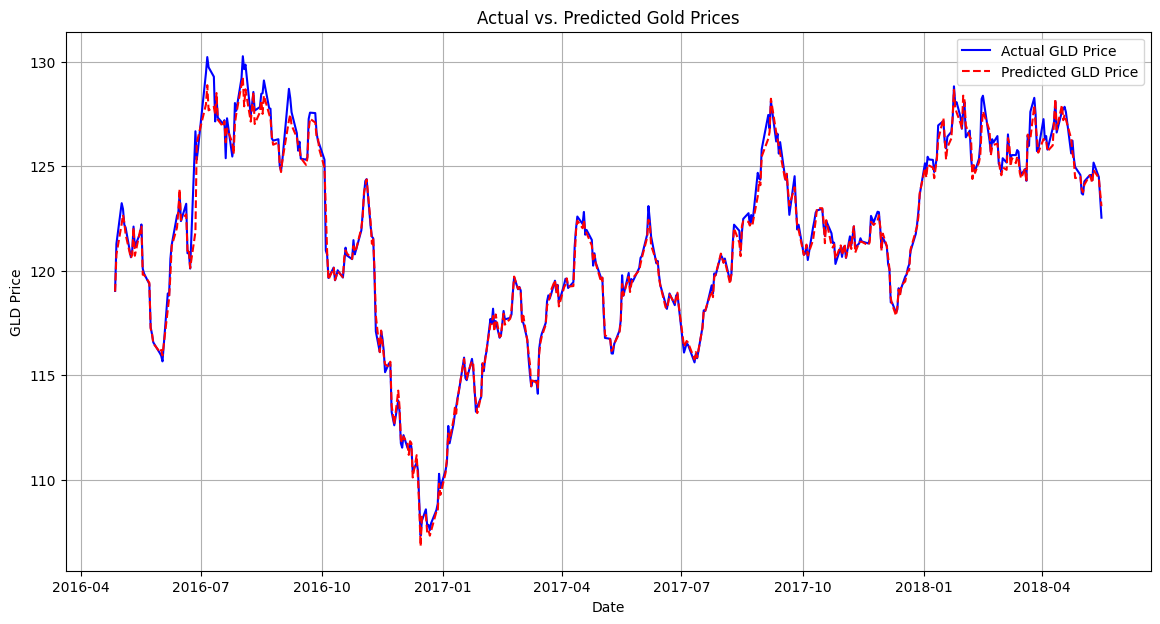

In [9]:
print("--- Model Evaluation ---")

# 1. Make predictions on the X_test data
y_pred = model.predict(X_test)
print("Predictions made on X_test data.")

# 2. Import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
print("Imported necessary evaluation metrics and plotting library.")

# 3. Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"\nMean Absolute Error (MAE): {mae:.4f}")

# 4. Calculate Root Mean Squared Error (RMSE)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

# 5. Calculate R-squared (R2) score
r2 = r2_score(y_test, y_pred)
print(f"R-squared (R2) score: {r2:.4f}")

# 6-11. Visualize the model's predictions against actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual GLD Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted GLD Price', color='red', linestyle='--')
plt.title('Actual vs. Predicted Gold Prices')
plt.xlabel('Date')
plt.ylabel('GLD Price')
plt.legend()
plt.grid(True)
plt.show()

## Model Explainability

Analyze the model to understand which features contribute most to the predictions.


To understand which features contribute most to the predictions, I need to extract the feature importances from the trained RandomForestRegressor model, organize them with their corresponding feature names, sort them in descending order, display the top 10, and then visualize them using a bar plot.



--- Analyzing Feature Importances ---
Feature importances extracted and stored in a Series.
Feature importances sorted in descending order.

--- Top 10 Most Important Features ---
GLD_Lag1               0.900410
GLD_RollingMean_7D     0.093011
GLD_RollingMean_30D    0.001846
SLV                    0.001809
GLD_Daily_Return       0.001675
SLV_Daily_Return       0.000358
EUR/USD                0.000240
GLD_RollingStd_7D      0.000097
USO                    0.000090
SPX                    0.000086
dtype: float64


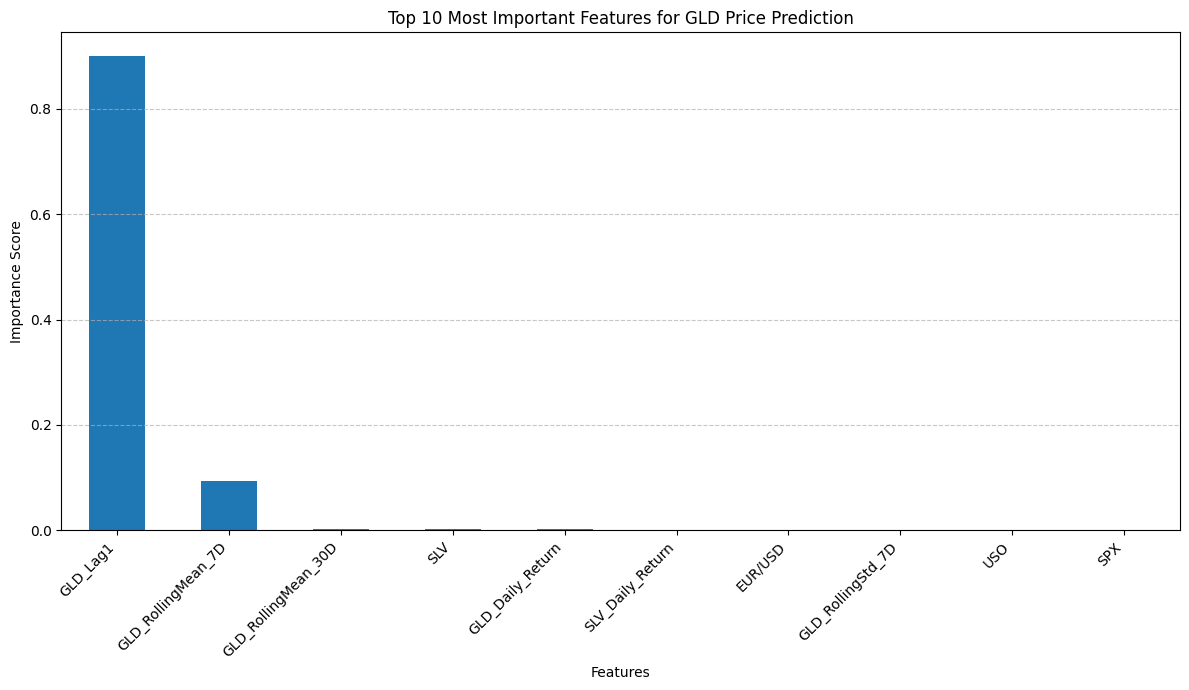

Bar plot visualizing top 10 feature importances displayed.


In [10]:
print("--- Analyzing Feature Importances ---")

# 1. Access feature importances from the trained RandomForestRegressor model
feature_importances = model.feature_importances_

# 2. Create a Pandas Series to store feature names and their corresponding importances
features = X_train.columns
feature_importance_series = pd.Series(feature_importances, index=features)
print("Feature importances extracted and stored in a Series.")

# 3. Sort the features by their importance in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)
print("Feature importances sorted in descending order.")

# 4. Print the top 10 most important features and their scores
print("\n--- Top 10 Most Important Features ---")
print(sorted_feature_importances.head(10))

# 5. Visualize the feature importances using a bar plot
plt.figure(figsize=(12, 7))
sorted_feature_importances.head(10).plot(kind='bar')
plt.title('Top 10 Most Important Features for GLD Price Prediction')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("Bar plot visualizing top 10 feature importances displayed.")

## Prepare Model for Deployment

Save the trained model in a format suitable for future deployment.


In [11]:
print("--- Saving the Trained Model ---")

# 1. Import the joblib library
import joblib
print("Imported joblib library.")

# 2. Define a filename for your saved model
model_filename = 'random_forest_gold_predictor.joblib'
print(f"Model will be saved as: {model_filename}")

# 3. Save the trained model object to the specified file
joblib.dump(model, model_filename)
print("Trained model saved successfully.")

# Optional: Verify the file creation (not part of the instruction, but good practice)
import os
if os.path.exists(model_filename):
    print(f"File '{model_filename}' created and found.")
else:
    print(f"Error: File '{model_filename}' was not created.")

--- Saving the Trained Model ---
Imported joblib library.
Model will be saved as: random_forest_gold_predictor.joblib
Trained model saved successfully.
File 'random_forest_gold_predictor.joblib' created and found.


### Data Analysis Key Findings

*   **Data Loading and Initial Exploration**: The historical Gold price data, containing 2290 entries and 6 columns (`Date`, `SPX`, `GLD`, `USO`, `SLV`, `EUR/USD`), was successfully loaded. No missing values were found in the initial dataset, and the 'Date' column was correctly converted to a datetime format.
*   **Data Preprocessing**: The 'Date' column was set as the DataFrame index, and no duplicate dates were identified. Two new features, `GLD_Lag1` (previous day's GLD price) and `GLD_RollingMean_7D` (7-day rolling average of GLD price), were created. Six rows at the beginning of the dataset were dropped to handle the `NaN` values introduced by these new features, resulting in a clean dataset.
*   **Feature Engineering**: Additional features were engineered, including:
    *   Time-based features: Year, Month, DayofWeek, DayofYear, Quarter, and WeekofYear.
    *   More rolling window statistics: `GLD_RollingMean_30D` and `GLD_RollingStd_7D`.
    *   Daily percentage returns for `GLD`, `SPX`, `USO`, `SLV`, and `EUR/USD`.
    A further 29 rows were dropped to address `NaN` values resulting from these new features, leading to a final DataFrame with 2255 rows and 20 columns.
*   **Model Development and Training**: The data was split chronologically into an 80% training set (1804 rows) and a 20% testing set (451 rows). A `RandomForestRegressor` model with 100 estimators and a `random_state` of 42 was successfully trained on the processed data.
*   **Model Evaluation**: The trained model demonstrated strong predictive performance on the test set:
    *   Mean Absolute Error (MAE): 0.2670
    *   Root Mean Squared Error (RMSE): 0.4451
    *   R-squared (R2) score: 0.9916
    A visualization of actual vs. predicted GLD prices confirmed a close alignment between the model's predictions and the true values.
*   **Model Explainability**: Feature importance analysis revealed that `GLD_Lag1` (previous day's Gold price) was by far the most influential feature, with an importance score of 0.900410. The `GLD_RollingMean_7D` was the second most important feature, with a score of 0.093011. This indicates that recent past gold prices are the primary drivers of the model's predictions.
*   **Model Deployment Preparation**: The trained `RandomForestRegressor` model was successfully saved to a file named `random_forest_gold_predictor.joblib` for future deployment and inference.
